In [18]:
import matplotlib
from emoatlas import EmoScores

import nltk
# nltk.download('wordnet')
import networkx as nx
import numpy as np
import pandas as pd
import shapely
import os
import matplotlib.pyplot as plt

src_path = os.getcwd()[0:-4]

text_font = 20

In [19]:
emos = EmoScores()

In [20]:
df = pd.read_csv(src_path+'data/articles_final.csv')
print(len(df))
idx = np.where(df['language'] == 'English')

df = df.loc[idx]
df['bias_rating'].value_counts()

70625


LEFT-CENTER                         29276
LEAST BIASED                        23835
RIGHT-CENTER                        11234
RIGHT                                3131
LEFT                                 2893
LEFT-CENTER (by Saudi standards)      104
LEFT CENTER                            66
FAR LEFT                               52
LEFT BIASED                            27
FAR-LEFT                                7
Name: bias_rating, dtype: int64

In [21]:
bias_allowed = ["LEFT-CENTER","RIGHT-CENTER","RIGHT","LEFT","FAR LEFT","FAR RIGHT","FAR-LEFT"]
df = df.loc[df['bias_rating'].isin(bias_allowed)]
len(df)

46593

In [22]:
#add new column to df with emotion scores
emotion_list = ['anger', 'trust', 'surprise', 'disgust', 'joy', 'sadness', 'fear', 'anticipation']

for emotion in emotion_list:
    df[emotion] = 0

for i in range(0,len(df)):

    sample_text = df.iloc[i]['title']
    fmnt = emos.formamentis_network(sample_text) 

    bag_of_words_dog = " ".join([pair[1] for pair in fmnt.edges])
    zscores = emos.zscores(bag_of_words_dog)

    for emotion in emotion_list:
        df.loc[i, emotion] = zscores[emotion]

df.head()

,url,domain,title,bias_rating,language,sourcecountry,date,russia,ukraine,nato,anger,trust,surprise,disgust,joy,sadness,fear,anticipation
196,http://www.lenconnect.com/opinion/20171229/ano...,lenconnect.com,Another View : Give Trump credit for defying P...,LEFT-CENTER,English,United States,2017-12-30 15:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,https://www.lenconnect.com/zz/news/20190824/tr...,lenconnect.com,Trump at the G - 7 summit : What we can expect...,LEFT-CENTER,English,United States,2019-08-24 20:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,https://www.lenconnect.com/story/opinion/colum...,lenconnect.com,James W . Pfister : U . S . motivation in Ukraine,LEFT-CENTER,English,United States,2023-01-15 11:45:00,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
568,http://www.bnd.com/news/nation-world/world/art...,bnd.com,"US Marines , Romanian troops hold Black Sea ex...",RIGHT-CENTER,English,United States,2017-03-20 16:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
569,http://www.bnd.com/news/business/article140263...,bnd.com,"In Trump America , Hungary finds a friendlier ...",RIGHT-CENTER,English,United States,2017-03-23 09:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df.to_csv(src_path+'data/article_emotion.csv', index=False)

/var/folders/3d/0hpwl4kd1js9nrw8nl0qpc7m0000gn/T/ipykernel_18766/3697633781.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['date'] = pd.to_datetime(temp_df['date'])


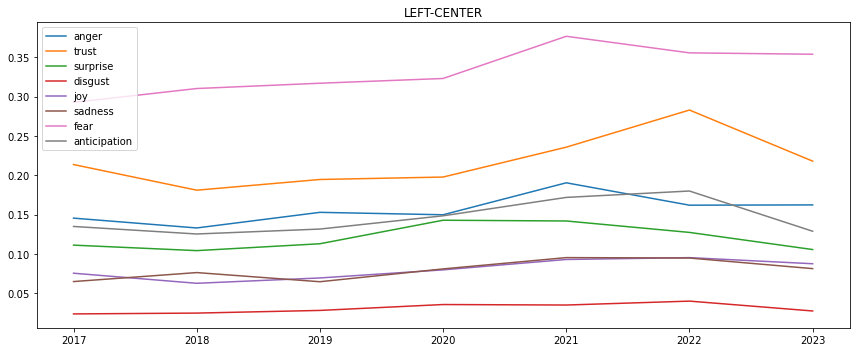

/var/folders/3d/0hpwl4kd1js9nrw8nl0qpc7m0000gn/T/ipykernel_18766/3697633781.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['date'] = pd.to_datetime(temp_df['date'])


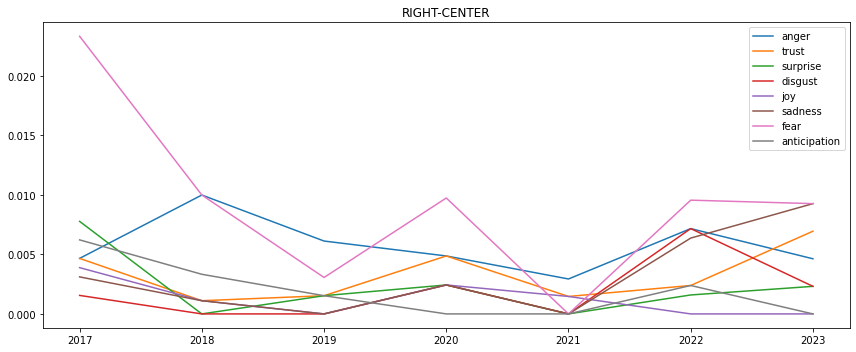

/var/folders/3d/0hpwl4kd1js9nrw8nl0qpc7m0000gn/T/ipykernel_18766/3697633781.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['date'] = pd.to_datetime(temp_df['date'])


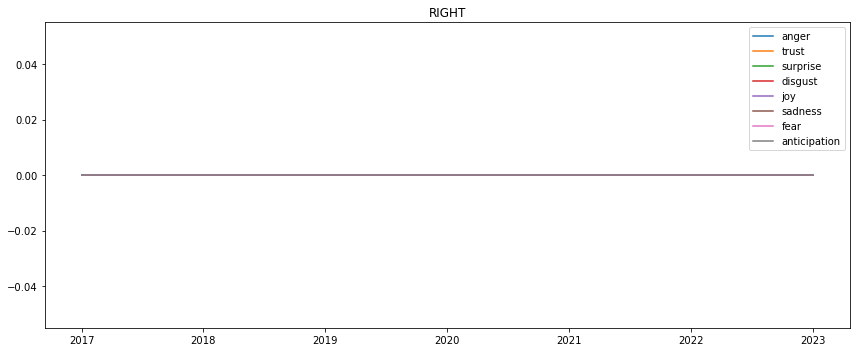

/var/folders/3d/0hpwl4kd1js9nrw8nl0qpc7m0000gn/T/ipykernel_18766/3697633781.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['date'] = pd.to_datetime(temp_df['date'])


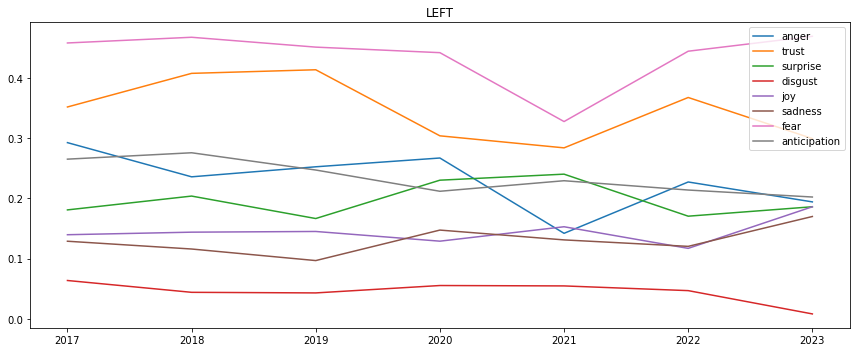

/var/folders/3d/0hpwl4kd1js9nrw8nl0qpc7m0000gn/T/ipykernel_18766/3697633781.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['date'] = pd.to_datetime(temp_df['date'])


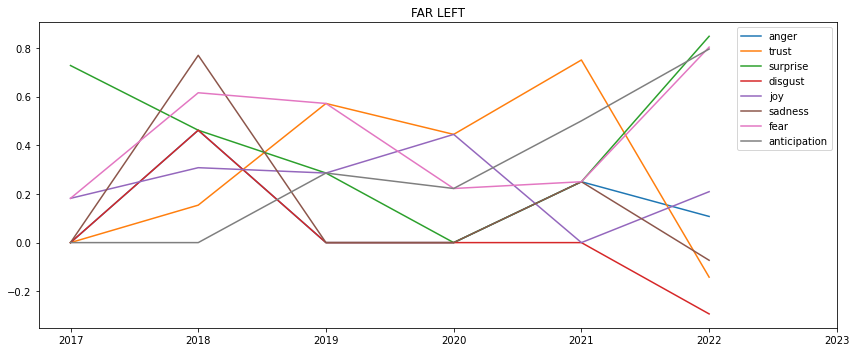

/var/folders/3d/0hpwl4kd1js9nrw8nl0qpc7m0000gn/T/ipykernel_18766/3697633781.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['date'] = pd.to_datetime(temp_df['date'])


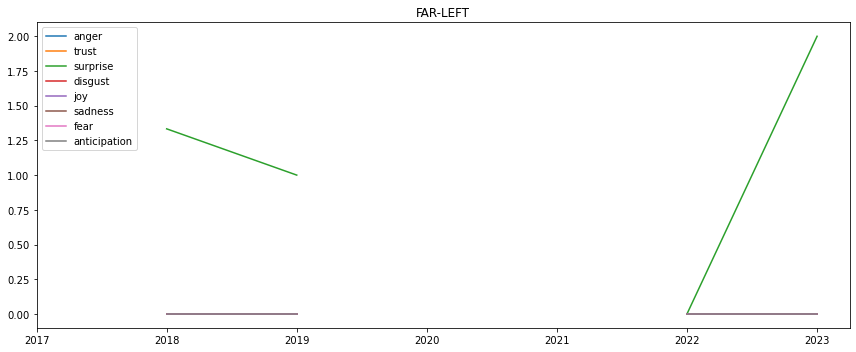

In [25]:
political_bias_list = list(dict(df['bias_rating'].value_counts()).keys())
year_list = [2017, 2018, 2019, 2020, 2021, 2022, 2023]

for political_bias in political_bias_list:
    temp_df = df[df['bias_rating'] == political_bias]

    temp_df['date'] = pd.to_datetime(temp_df['date'])

    fig, ax = plt.subplots(figsize=(12, 5))
    for emotion in emotion_list:
        year_data_emotion = []
        
        for year in year_list:
            temp_temp_df = temp_df[temp_df['date'].dt.year == year]
            year_data_emotion.append(temp_temp_df[emotion].mean())

        ax.plot(year_list, year_data_emotion, label=emotion)
    ax.set_title(political_bias)
    ax.set_xticks(year_list)
    ax.legend()

    plt.tight_layout()
    plt.show()